In [1]:
import seaborn as sns
import pandas as pd
import yaml

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sns.set(font="Arial")
sns.set_context("paper")
sns.set_style("whitegrid")
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['ytick.left'] = True
mpl.rcParams['xtick.bottom'] = True

In [3]:
default_colors = {
    "indigo": "#332288",
    "cyan": "#88CCEE",
    "teal": "#44AA99",
    "green": "#117733",
    "olive": "#999933",
    "sand": "#DDCC77",
    "rose": "#CC6677",
    "wine": "#882255",
    "purple": "#AA4499",
    "grey": "#DDDDDD",
}

eval_setting_map = {
    "identity": default_colors["wine"],
    "CAROT": default_colors["cyan"],
    "conCAROT": default_colors["indigo"],
    "conCAROT-OOD": default_colors["indigo"],
    "within condition": default_colors["green"],
    "chemCPA": default_colors["sand"],
    "avg CAR": default_colors["rose"]
}

geneset_map = {
    "functional": default_colors["olive"],
    "functional+score": default_colors["rose"],
    "HVG": default_colors["teal"],
    "random": default_colors["sand"],
}

subset_map = {
    "CD4": default_colors["teal"],
    "CD8": default_colors["purple"],
}

ot_map = {
    "source": default_colors["cyan"],
    "target": default_colors["sand"],
    "transport": default_colors["rose"],
    "rest": default_colors["grey"]
}

cond_ood_comp = {
    "CAROT": default_colors["cyan"],
    "conCAROT": default_colors["indigo"],
    "conCAROT-OOD": default_colors["teal"],
    "chemCPA-OOD": default_colors["sand"],
    "avg CAR": default_colors["rose"]
}

In [4]:
base_fig_save = "/Users/alicedriessen/Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Figures/cmonge/ood/41BB_OOD_"
exp_order = ["conCAROT", "conCAROT-OOD", "identity"] + ["within condition"]*10

In [5]:
all_mean_metrics = []
for subset in ["CD4", "CD8"]:
    with open(f"/Users/alicedriessen/Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Model/conditional-monge/experiments/cmonge_ood/41BB_OOD/{subset}/logs.yaml", "r") as stream:
        logs = yaml.safe_load(stream)
   
    for i in range(len(logs["experiments"])):
        eval_setting = exp_order[i]
        for condition, results in logs["experiments"][i]["valid-set"].items():
            res = pd.Series(results["mean_statistics"])
            res = res.reset_index(drop=False).rename(columns={"index": "metric", 0: "score"})
            res["embedding"] = "ESM XL"
            res["eval_car"] = condition
            res["eval_setting"] = eval_setting
            res["subset"] = subset
            all_mean_metrics.append(res)

In [6]:
res = pd.concat(all_mean_metrics).reset_index(drop=True)
res = res[~res["eval_car"].isin(["NA-NA-NA", "NA-NA-z"])]
res

,metric,score,embedding,eval_car,eval_setting,subset
0,mean_wasserstein,5.536993,ESM XL,CD28-CD28-z,conCAROT,CD4
1,mean_mmd,0.027516,ESM XL,CD28-CD28-z,conCAROT,CD4
2,mean_sinkhorn div,5.060203,ESM XL,CD28-CD28-z,conCAROT,CD4
3,mean_monge_gap,11.400404,ESM XL,CD28-CD28-z,conCAROT,CD4
4,mean_drug_signature,0.826802,ESM XL,CD28-CD28-z,conCAROT,CD4
...,...,...,...,...,...,...
595,mean_mmd,0.011673,ESM XL,IL15RA-41BB-z,within condition,CD8
596,mean_sinkhorn div,5.438727,ESM XL,IL15RA-41BB-z,within condition,CD8
597,mean_monge_gap,12.200461,ESM XL,IL15RA-41BB-z,within condition,CD8
598,mean_drug_signature,0.739604,ESM XL,IL15RA-41BB-z,within condition,CD8


In [7]:
# Average CAR results
all_mean_metrics = []
for subset in ["CD4", "CD8"]:
    with open(f"/Users/alicedriessen/Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Model/conditional-monge/experiments/cmonge_ood/41BB_OOD/model_sel_cars_{subset}_avg_CAR_all_cars_eval.yaml", "r") as stream:
        logs = yaml.safe_load(stream)
   
    for i in range(len(logs["experiments"])):
        for condition, results in logs["experiments"][i]["valid-set"].items():
            result = pd.Series(results["mean_statistics"])
            result = result.reset_index(drop=False).rename(columns={"index": "metric", 0: "score"})
            result["embedding"] = "ESM XL"
            result["eval_car"] = condition
            result["eval_setting"] = "avg CAR"
            result["subset"] = subset
            all_mean_metrics.append(result)
avg_car_res = pd.concat(all_mean_metrics)
avg_car_res = avg_car_res[["41BB" in c for c in avg_car_res["eval_car"]]]

In [8]:
avg_car_res

,metric,score,embedding,eval_car,eval_setting,subset
0,mean_wasserstein,6.004433,ESM XL,41BB-41BB-z,avg CAR,CD4
1,mean_mmd,0.008197,ESM XL,41BB-41BB-z,avg CAR,CD4
2,mean_sinkhorn div,5.464130,ESM XL,41BB-41BB-z,avg CAR,CD4
3,mean_monge_gap,11.571481,ESM XL,41BB-41BB-z,avg CAR,CD4
4,mean_drug_signature,0.754894,ESM XL,41BB-41BB-z,avg CAR,CD4
...,...,...,...,...,...,...
1,mean_mmd,0.011103,ESM XL,IL15RA-41BB-z,avg CAR,CD8
2,mean_sinkhorn div,6.173620,ESM XL,IL15RA-41BB-z,avg CAR,CD8
3,mean_monge_gap,12.085499,ESM XL,IL15RA-41BB-z,avg CAR,CD8
4,mean_drug_signature,1.204605,ESM XL,IL15RA-41BB-z,avg CAR,CD8


In [9]:
# chemCPA results
chemcpa = pd.read_csv("/Users/alicedriessen/Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Model/chemCPA/41BB_OOD_CD4_CD8_carot_results.csv", index_col=0).reset_index(drop=True)
chemcpa = chemcpa[~chemcpa["eval_car"].isin(["NA-NA-NA", "NA-NA-z"])]
chemcpa

,metric,score,eval_car,eval_setting,subset
0,mean_drug_signature,0.813939,41BB-41BB-z,chemCPA,CD4
1,mean_mmd,0.185199,41BB-41BB-z,chemCPA,CD4
2,mean_monge_gap,12.596631,41BB-41BB-z,chemCPA,CD4
3,mean_r2,0.974135,41BB-41BB-z,chemCPA,CD4
4,mean_sinkhorn div,4.721583,41BB-41BB-z,chemCPA,CD4
...,...,...,...,...,...
115,mean_mmd,0.253200,IL15RA-41BB-z,chemCPA,CD8
116,mean_monge_gap,12.569225,IL15RA-41BB-z,chemCPA,CD8
117,mean_r2,0.848276,IL15RA-41BB-z,chemCPA,CD8
118,mean_sinkhorn div,6.168831,IL15RA-41BB-z,chemCPA,CD8


# In distribution performance

## Monge

In [10]:
base_log_dir = "/Users/alicedriessen/Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Model/conditional-monge/experiments/monge/FuncScore/logs/"
experiment_order = ["CAROT", "identity", "within condition"]
all_mean_metrics = []
for subset in ["CD4", "CD8"]:
    for car in avg_car_res["eval_car"].unique():
        if car in ["NA-NA-z", "NA-NA-NA"]:
            continue
        with open(f"{base_log_dir}{subset}__NA-NA-NA_{car}_logs.yaml") as stream:
            logs = yaml.safe_load(stream)
        print(subset, car, len(logs["experiments"]))
        for i, exp in enumerate(logs["experiments"]):
            mean_stats = pd.DataFrame.from_dict(logs["experiments"][i]["mean_statistics"], orient="index")
            mean_stats['eval_car'] = car
            mean_stats["eval_setting"] = experiment_order[i]
            mean_stats["subset"] = subset

            all_mean_metrics.append(mean_stats)

CD4 41BB-41BB-z 3
CD4 41BB-CD28-z 3
CD4 41BB-CD40-z 3
CD4 41BB-CTLA4-z 3
CD4 41BB-IL15RA-z 3
CD4 41BB-NA-z 3
CD4 CD28-41BB-z 3
CD4 CD40-41BB-z 3
CD4 CTLA4-41BB-z 3
CD4 IL15RA-41BB-z 3
CD8 41BB-41BB-z 3
CD8 41BB-CD28-z 3
CD8 41BB-CD40-z 3
CD8 41BB-CTLA4-z 3
CD8 41BB-IL15RA-z 3
CD8 41BB-NA-z 3
CD8 CD28-41BB-z 3
CD8 CD40-41BB-z 3
CD8 CTLA4-41BB-z 3
CD8 IL15RA-41BB-z 3


In [11]:
ID_monge_res = pd.concat(all_mean_metrics).reset_index(drop=False).rename(columns={0: "score", "index": "metric"})
ID_monge_res = ID_monge_res[~ID_monge_res["eval_car"].isin(["NA-NA-NA", "NA-NA-z"])]
id_monge_scores = ID_monge_res[ID_monge_res["eval_setting"]=="CAROT"]
id_monge_scores

,metric,score,eval_car,eval_setting,subset
0,mean_wasserstein,5.668510,41BB-41BB-z,CAROT,CD4
1,mean_mmd,0.024757,41BB-41BB-z,CAROT,CD4
2,mean_sinkhorn div,5.192612,41BB-41BB-z,CAROT,CD4
3,mean_monge_gap,11.405769,41BB-41BB-z,CAROT,CD4
4,mean_drug_signature,0.731012,41BB-41BB-z,CAROT,CD4
...,...,...,...,...,...
343,mean_mmd,0.023836,IL15RA-41BB-z,CAROT,CD8
344,mean_sinkhorn div,5.549700,IL15RA-41BB-z,CAROT,CD8
345,mean_monge_gap,11.656920,IL15RA-41BB-z,CAROT,CD8
346,mean_drug_signature,0.777715,IL15RA-41BB-z,CAROT,CD8


## CMonge

In [12]:
logger_path = "/Users/alicedriessen/Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Model/conditional-monge/experiments/cmonge/LN_True_grad_acc_4_cosine/CD4_esm_large_tail_dim_FuncScore/"
exp_order = ["conCAROT", "identity"] + ["within condition"]*32

all_mean_metrics=[]
for subset in ["CD4", "CD8"]:
    with open(f"{logger_path}logs.yaml",) as stream:
            logs = yaml.safe_load(stream)
            
    print(subset, len(logs["experiments"]))
        
    for i in range(len(logs["experiments"])):
        eval_setting = exp_order[i]
        for condition, results in logs["experiments"][i]["valid-set"].items():
            result = pd.Series(results["mean_statistics"])
            result = result.reset_index(drop=False).rename(columns={"index": "metric", 0: "score"})
            result["eval_car"] = condition
            result["eval_setting"] = eval_setting
            result["subset"] = subset
            all_mean_metrics.append(result)

CD4 34
CD8 34


In [13]:
ID_cmonge_res = pd.concat(all_mean_metrics).reset_index(drop=True)
ID_cmonge_res = ID_cmonge_res[~ID_cmonge_res["eval_car"].isin(["NA-NA-NA", "NA-NA-z"])]
ID_cmonge_res["eval_setting"] = ["conCAROT" if "cmonge" in s else s for s in ID_cmonge_res["eval_setting"]]

In [14]:
ID_cmonge_res["41BB"] = ["41BB" in car for car in ID_cmonge_res["eval_car"]]
id_cmonge_scores = ID_cmonge_res[(ID_cmonge_res["41BB"])&(ID_cmonge_res["eval_setting"]=="conCAROT")]
id_cmonge_scores

,metric,score,eval_car,eval_setting,subset,41BB
0,mean_wasserstein,5.547930,41BB-41BB-z,conCAROT,CD4,True
1,mean_mmd,0.026711,41BB-41BB-z,conCAROT,CD4,True
2,mean_sinkhorn div,5.073400,41BB-41BB-z,conCAROT,CD4,True
3,mean_monge_gap,11.395885,41BB-41BB-z,conCAROT,CD4,True
4,mean_drug_signature,0.817859,41BB-41BB-z,conCAROT,CD4,True
...,...,...,...,...,...,...
721,mean_mmd,0.027227,IL15RA-41BB-z,conCAROT,CD8,True
722,mean_sinkhorn div,5.082065,IL15RA-41BB-z,conCAROT,CD8,True
723,mean_monge_gap,11.451787,IL15RA-41BB-z,conCAROT,CD8,True
724,mean_drug_signature,0.881323,IL15RA-41BB-z,conCAROT,CD8,True


# Results

In [15]:
ood_res = pd.concat([res, chemcpa, avg_car_res])
ood_res = ood_res[["41BB" in c for c in ood_res["eval_car"]]]

In [16]:
res["eval_setting"].unique()

array(['conCAROT', 'conCAROT-OOD', 'identity', 'within condition'],
      dtype=object)

In [17]:
ood_res["eval_setting"].unique()

array(['conCAROT-OOD', 'identity', 'within condition', 'chemCPA',
       'avg CAR'], dtype=object)

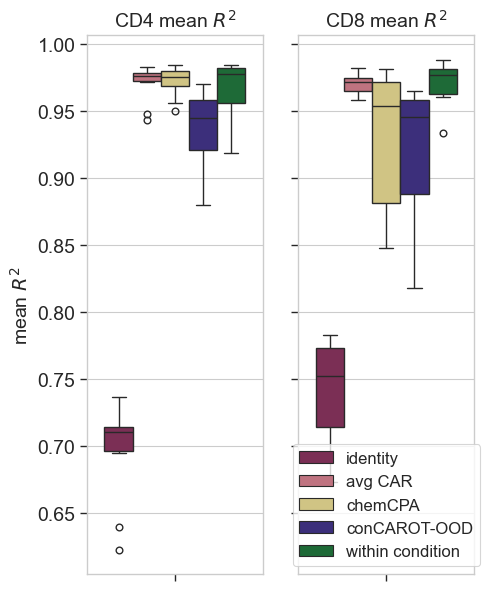

In [18]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,7))
for i, subset in enumerate(["CD4", "CD8"]):
    plt_data = ood_res[(ood_res["subset"]==subset)&(ood_res["metric"]=="mean_r2")]
    plt_data = plt_data.rename(columns={"eval_setting": ""})
    sns.boxplot(data=plt_data, y="score", hue="", ax=axes[i], palette=eval_setting_map,
               hue_order=["identity", "avg CAR", "chemCPA", "conCAROT-OOD", "within condition"])
    axes[i].set_title(f"{subset} mean $R^2$", fontsize=14)
    axes[i].set_ylabel("mean $R^2$", fontsize=14)
    axes[i].tick_params(which="both", axis="both", labelsize=14)

    
axes[0].get_legend().remove()
axes[1].legend(fontsize=12, loc="lower center")
plt.tick_params(which="both", axis="both", labelsize=14)
plt.savefig(f"{base_fig_save}R2_performance.pdf", bbox_inches="tight")

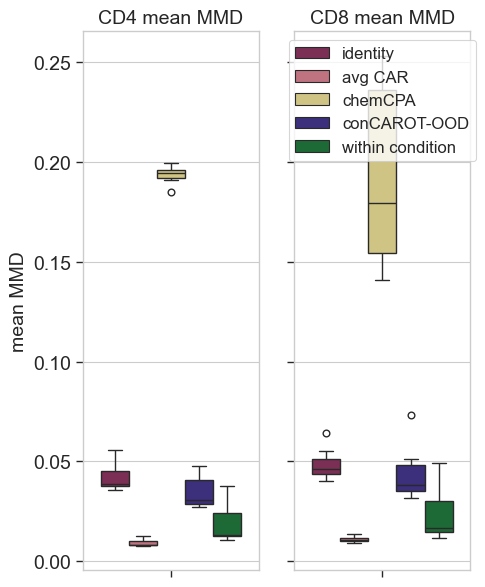

In [19]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,7))
for i, subset in enumerate(["CD4", "CD8"]):
    plt_data = ood_res[(ood_res["subset"]==subset)&(ood_res["metric"]=="mean_mmd")]
    plt_data = plt_data.rename(columns={"eval_setting": ""})
    sns.boxplot(data=plt_data, y="score", hue="", ax=axes[i], palette=eval_setting_map,
               hue_order=["identity", "avg CAR", "chemCPA", "conCAROT-OOD", "within condition"])
    axes[i].set_title(f"{subset} mean MMD", fontsize=14)
    axes[i].set_ylabel("mean MMD", fontsize=14)
    axes[i].tick_params(which="both", axis="both", labelsize=14)

    
axes[0].get_legend().remove()
axes[1].legend(fontsize=12, loc="upper center")
plt.tick_params(which="both", axis="both", labelsize=14)
plt.savefig(f"{base_fig_save}MMD_performance.pdf", bbox_inches="tight")

## Compare with ID results

In [20]:
all_res = pd.concat([res, chemcpa, avg_car_res, id_cmonge_scores, id_monge_scores])
all_res = all_res[["41BB" in c for c in all_res["eval_car"]]]
all_res["Model"] = all_res["eval_setting"]
all_res["Model"] = ["chemCPA-OOD" if "chemCPA" in m else m for m in all_res["Model"]]


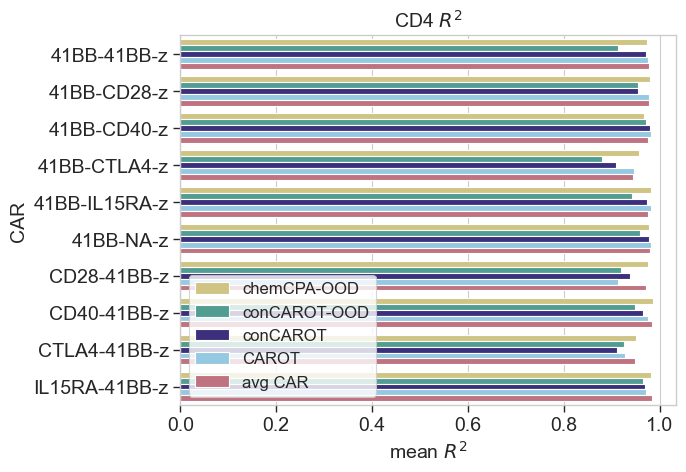

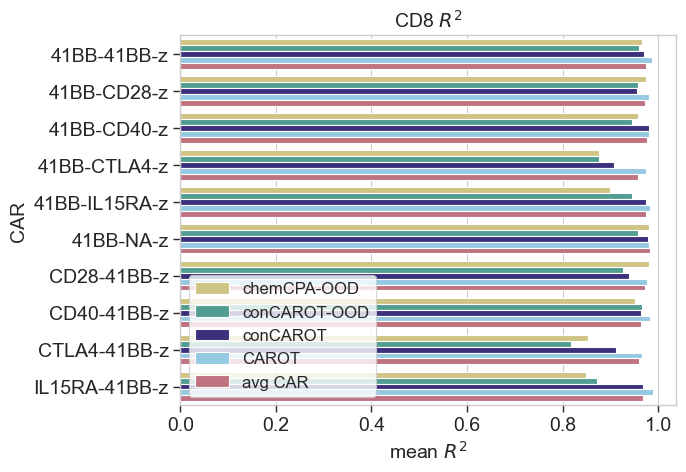

In [24]:
for subset in ["CD4", "CD8"]:
    sns.barplot(data=all_res[(all_res["metric"]=="mean_r2")&(all_res["subset"]==subset)], y="eval_car", x="score", hue="Model", palette=cond_ood_comp,
               hue_order=["chemCPA-OOD", "conCAROT-OOD", "conCAROT", "CAROT", "avg CAR"])
    plt.tick_params(which="both", axis="both", labelsize=14)
    plt.xlabel("mean $R^2$", fontsize=14)
    plt.ylabel("CAR", fontsize=14)
    plt.legend(fontsize=12, loc="lower left")
    plt.title(f"{subset} $R^2$", fontsize=14)
    plt.savefig(f"{base_fig_save}_{subset}_results_R2.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

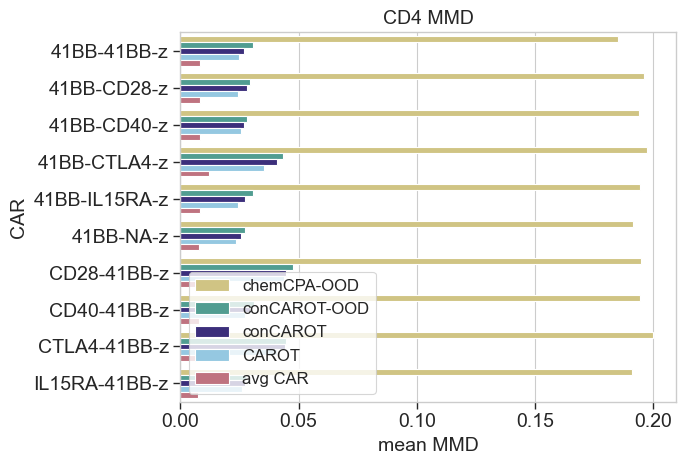

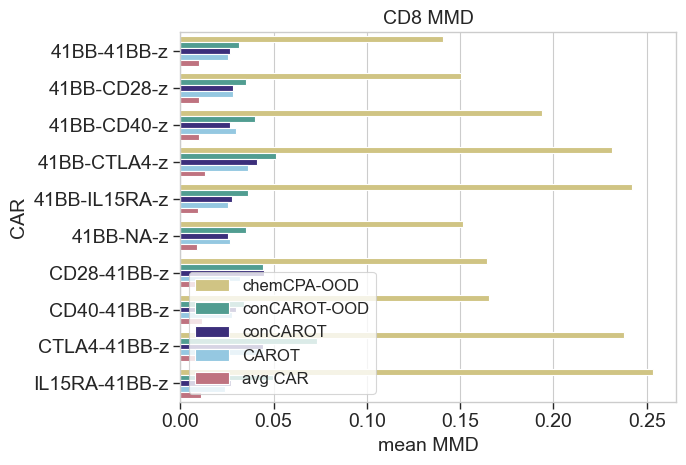

In [25]:
for subset in ["CD4", "CD8"]:
    sns.barplot(data=all_res[(all_res["metric"]=="mean_mmd")&(all_res["subset"]==subset)], y="eval_car", x="score", hue="Model", palette=cond_ood_comp,
               hue_order=["chemCPA-OOD", "conCAROT-OOD", "conCAROT", "CAROT", "avg CAR"])
    plt.tick_params(which="both", axis="both", labelsize=14)
    plt.xlabel("mean MMD", fontsize=14)
    plt.ylabel("CAR", fontsize=14)
    plt.legend(fontsize=12, loc="lower left")
    plt.title(f"{subset} MMD", fontsize=14)
    plt.savefig(f"{base_fig_save}_{subset}_results_MMD.pdf", bbox_inches="tight")
    plt.show()
    plt.close()